In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Obtener y analizar datos

In [3]:
def leer_datos(ruta):
    df = pd.read_csv(ruta,sep=',')   
    return df

In [4]:
entrenamiento = leer_datos("train_Titanic.csv")
print(entrenamiento.info())
print(entrenamiento.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                

In [5]:
"""Analizo valores, en este caso tenemos varios datos nullos"""
entrenamiento.isna().sum().sort_values()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

<AxesSubplot:>

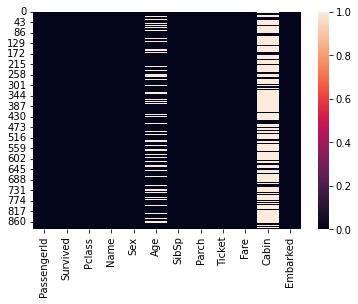

In [6]:
"""los espacios en blanco representan los valores faltantes/nulos"""
sns.heatmap(entrenamiento.isna())

<AxesSubplot:xlabel='Survived', ylabel='count'>

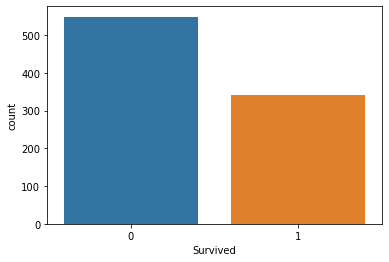

In [7]:
"""NO no sobreviven"""
sns.countplot(x='Survived', data=entrenamiento)

<AxesSubplot:xlabel='Survived', ylabel='count'>

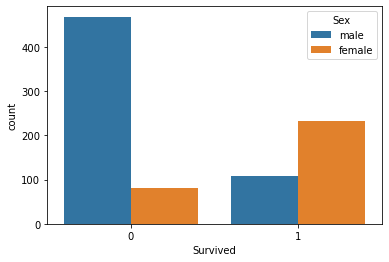

In [8]:
sns.countplot(x='Survived', data=entrenamiento, hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

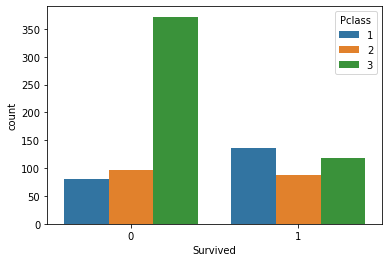

In [9]:
sns.countplot(x='Survived', data=entrenamiento, hue="Pclass")

C:\Users\ANALISIS DE DATOS\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'kde elimina la parte de linea curva q muestra la normal\npuedo especificar el # de columnas con bins'

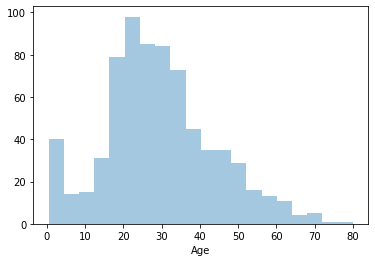

In [10]:
"""vemos q la mayor parte esta entre los 20 y 40"""
sns.distplot(entrenamiento["Age"].dropna(), kde=False)
"""kde elimina la parte de linea curva q muestra la normal
puedo especificar el # de columnas con bins"""
# sns.distplot(entrenamiento["Age"].dropna(), kde=False, bins=30)

'0 representa la gente qu no tenia familiares, 1 la gente con 200 familiares'

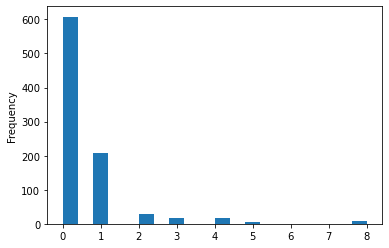

In [11]:
# numero de familiares de c/pasajero
entrenamiento['SibSp'].plot.hist(bins=20)
"""0 representa la gente qu no tenia familiares, 1 la gente con 200 familiares"""

### 2. Limpieza de datos

<AxesSubplot:>

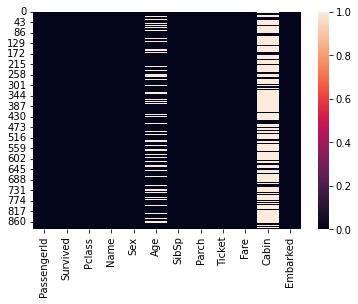

In [12]:
sns.heatmap(entrenamiento.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

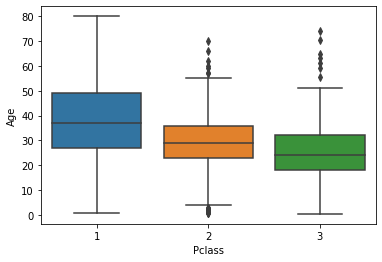

In [13]:
# vamos a modificar el valor nullo por el valor medio
# calcular la edad media x cada una de las categorias (1ra,2da,y 3ra clase)
"""la linea que divide la caja representa el valor medio
38 clase 1, 30 clase 2, 25 clase 3"""
sns.boxplot(x="Pclass", y="Age", data=entrenamiento)

In [14]:
#rellenar valores nulos con la media de los valores
def calcular_edad_media(columnas):
    edad= columnas[0]
    clase=columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25
    else:
        return edad
    
# Invoco a la función calcular_edad_media 
entrenamiento["Age"] = entrenamiento[["Age","Pclass"]].apply(calcular_edad_media, axis=1)
entrenamiento.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [15]:
# Borramos la columna Cabin
entrenamiento.drop("Cabin",axis=1,inplace=True)

<AxesSubplot:>

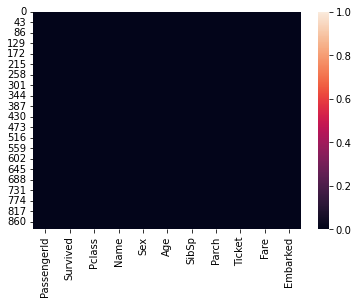

In [16]:
# Visualizamos los datos actuales
sns.heatmap(entrenamiento.isnull())

In [17]:
#queda asi el dataset, lo q interesa es dejar las columnas numericas
# por tanto podemos eliminar columnas alfanumericas Nombre y Ticket
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
entrenamiento.drop(["Name","Ticket","PassengerId"],axis=1,inplace=True)
entrenamiento.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [19]:
"""sexo es alfanumerica sin embargo podria ser importante,
por tanto la convertimos en numerica con getdummiers hombre = 1 , mujer = 0
lo que era 1 columas ahora son dos donde o es 1 o es 0"""
pd.get_dummies(entrenamiento["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [20]:
"""basta con mostrar una columna"""
sexo = pd.get_dummies(entrenamiento["Sex"], drop_first=True)
sexo.head(3)

,male
0,1
1,0
2,0


In [21]:
#se añade al dataset y borro la que ya no hace falta
entrenamiento = pd.concat([entrenamiento,sexo],axis=1)
entrenamiento.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0


In [22]:
entrenamiento.drop("Sex",axis=1,inplace=True)
entrenamiento.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0


In [23]:
#Cambiamos los valores alfanumericos en numericos
puerto= pd.get_dummies(entrenamiento["Embarked"])
puerto.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [24]:
# es suficiente quedarse con 2 columnas, 
#si dos son 0 0 qioeres decir que es de al categoria que falta
puerto= pd.get_dummies(entrenamiento["Embarked"],drop_first=True)
puerto.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [25]:
entrenamiento = pd.concat([entrenamiento,puerto],axis=1)
entrenamiento.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1


In [26]:
# Elimino Embarked	
entrenamiento.drop("Embarked",axis=1,inplace=True)
entrenamiento.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [27]:
entrenamiento=entrenamiento.rename(columns={"male":"Sex"})
entrenamiento.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


In [29]:
# CONCLUSIÓn el modelo es aceptable..

In [28]:
import pickle

In [30]:
with open("modelo_entrenado.pickle", "wb") as file:
    pickle.dump(modelo, file)

NameError: name 'modelo' is not defined

In [ ]:
with open("modelo_entrenado.pickle", "rb") as file:
    modelo2 = pickle.load(file)

In [ ]:
y_pred = modelo2.predict(x_test)
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)